# Importando as bibliotecas

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

## Carregando os Dados

In [ ]:
dados = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

## Informações dos Dados


In [ ]:
print('Tamanho dos dados:',dados.shape)
print('Dados Duplicados:', dados.duplicated().sum())

info_data = pd.DataFrame({
    'Unique':dados.nunique(),
    'Null':dados.isna().sum(),
    'NullPercent':round(dados.isna().sum() / len(dados)*100),
    'Type':dados.dtypes.values
})
info_data

Tamanho dos dados: (5110, 12)
Dados Duplicados: 0


,Unique,Null,NullPercent,Type
id,5110,0,0.0,int64
gender,3,0,0.0,object
age,104,0,0.0,float64
hypertension,2,0,0.0,int64
heart_disease,2,0,0.0,int64
ever_married,2,0,0.0,object
work_type,5,0,0.0,object
Residence_type,2,0,0.0,object
avg_glucose_level,3979,0,0.0,float64
bmi,418,201,4.0,float64


- Observado a tabela, a coluna de BMI contém 201 dados faltantes. Quando chegar na parte de treinamento irei transformar está coluna utilizando o metódo de imputação. Mas no momento, estarei apenas visualizando os colunas graficamente.

In [ ]:
dados.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df = dados.copy()
df = df[df['gender'] != 'Other']

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Gráficos

In [ ]:
# identificando as colunas com valores únicos abaixo de 5, para usá-los no gráfico de pizza
for i in df.columns:
  if df[i].nunique() <=5:
    print(i)

gender
hypertension
heart_disease
ever_married
work_type
Residence_type
smoking_status
stroke


- Visualizando a porcentagem dos dados de cada coluna no conjunto de dados

In [ ]:
fig = make_subplots(2,2,specs=[[{'type':'domain'},{'type':'domain'}],
                                [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Gênero','Hypertension','Heart_Disease','Married'])

fig.add_trace(go.Pie(labels=df['gender'].value_counts().index, values=df['gender'].value_counts()),1,1)

fig.add_trace(go.Pie(labels=df['hypertension'].value_counts().index, values=df['hypertension'].value_counts()),1,2)

fig.add_trace(go.Pie(labels=df['heart_disease'].value_counts().index, values=df['heart_disease'].value_counts()),2,1)

fig.add_trace(go.Pie(labels=df['ever_married'].value_counts().index, values=df['ever_married'].value_counts()),2,2)

fig.update(layout_showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(2,2,specs=[[{'type':'domain'},{'type':'domain'}],
                                [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Residence','Smoking','Stroke','Work Type'])

fig.add_trace(go.Pie(labels=df['Residence_type'].value_counts().index, values=df['Residence_type'].value_counts()),1,1)

fig.add_trace(go.Pie(labels=df['smoking_status'].value_counts().index, values=df['smoking_status'].value_counts()),1,2)

fig.add_trace(go.Pie(labels=df['stroke'].value_counts().index, values=df['stroke'].value_counts()),2,1)

fig.add_trace(go.Pie(labels=df['work_type'].value_counts().index, values=df['work_type'].value_counts()),2,2)

fig.update_traces(hole=.4)
fig.update(layout_showlegend=False)
fig.show()

- Podemos ver no gráfico que os dados estão desequilibrados, como a coluna 'Stroke', 'Hypertension', 'Heart Disease'.

- Agora vamos olhar mais de perto os valores únicos de cada coluna.

In [ ]:
# selecionando os valores categóricos 
cat = df.select_dtypes(include='O')
for c in cat:
  print('-'*3,c,'-'*3)
  print(df[c].value_counts())
  print()

--- gender ---
Female    2994
Male      2115
Name: gender, dtype: int64

--- ever_married ---
Yes    3353
No     1756
Name: ever_married, dtype: int64

--- work_type ---
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

--- Residence_type ---
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

--- smoking_status ---
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64



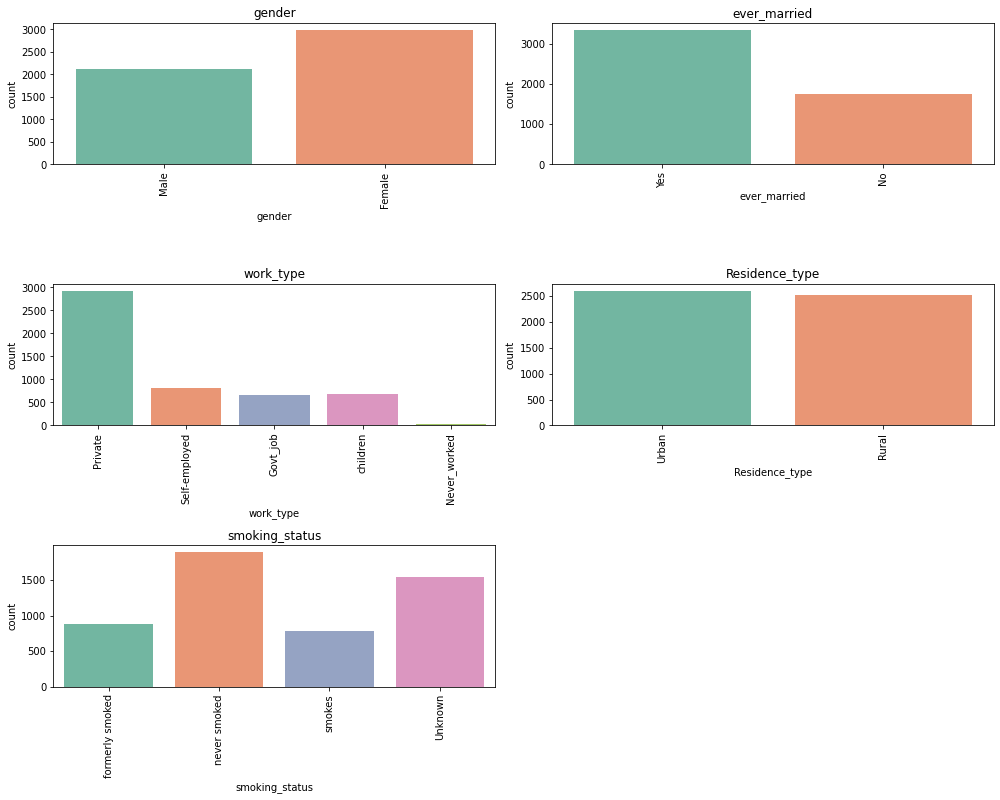

In [ ]:
# visualizando a contagem de dados em colunas categóricas
plt.figure(figsize=(14,17))
for i, c in enumerate(cat):
  axes = plt.subplot(5,2, i + 1)
  sns.countplot(x=df[c], ax=axes, palette='Set2')
  plt.xticks(rotation=90);
  plt.title(c, fontsize=12)
plt.tight_layout()
plt.show()

- Vemos que o gênero feminino é maior que o público masculino, porém por ser em maior quantidade nos dados, elas são mais propensas a fumar do que os homens? Por serem em quantidade, as colunas seguintes tem uma forte relações com este gênero? 
- Nos status de Fumante pode-se observar que a maioria das pessoas não fumam, enquanto outros são desconhecido.

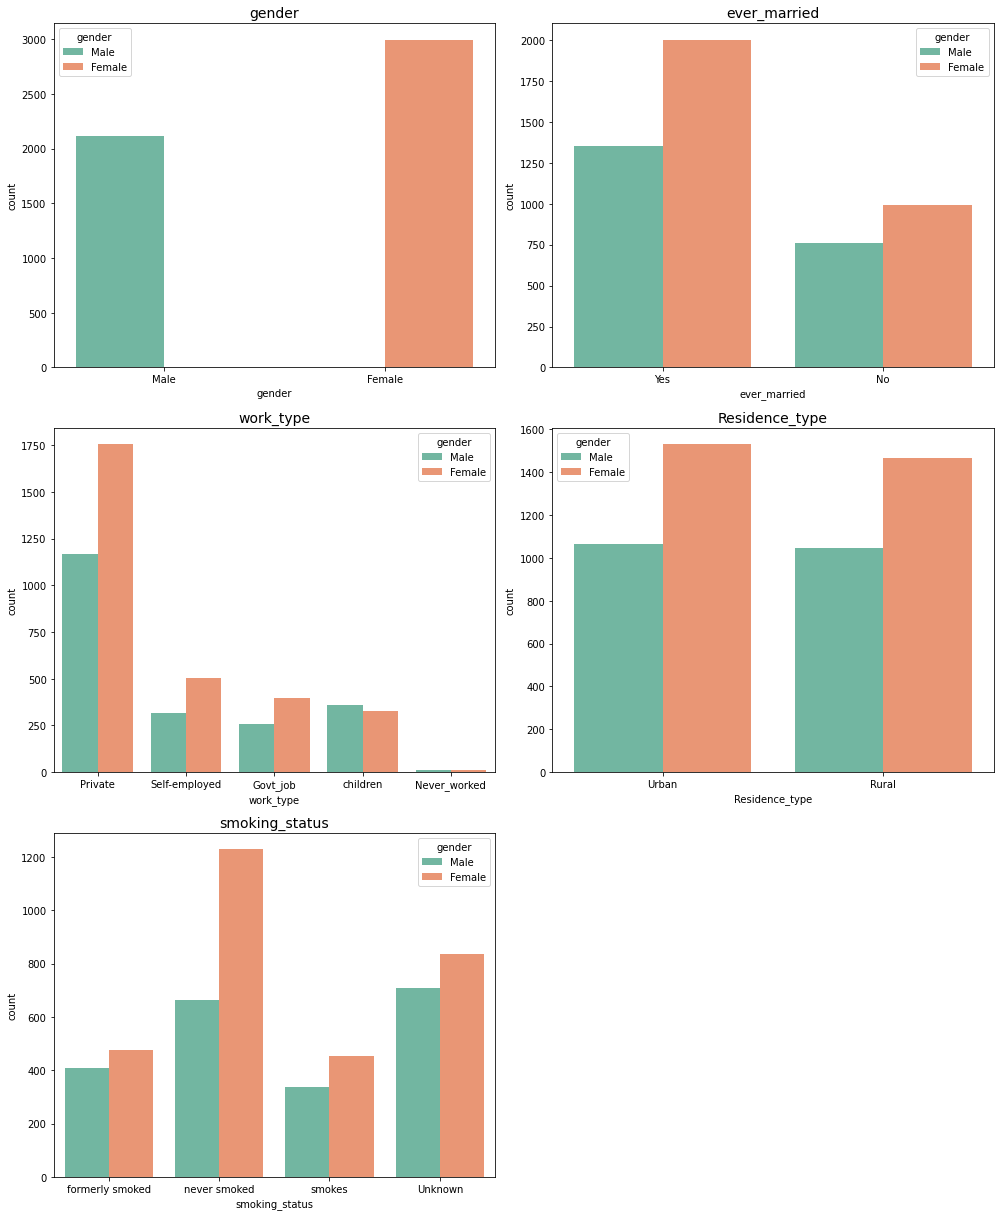

In [ ]:
# Qual a relação dos gêneros com outras colunas?
plt.figure(figsize=(14,17))
for i, col in enumerate(cat):
  axes = plt.subplot(3,2, i + 1)
  sns.countplot(x=df[col], hue=df['gender'], ax=axes, palette='Set2')
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

- Respondendo a primeira pergunta, embora os dados apresentem uma quantidade pequena sobre fumantes, as mulheres são mais propensas a fumar e tem grande relação com as outras colunas

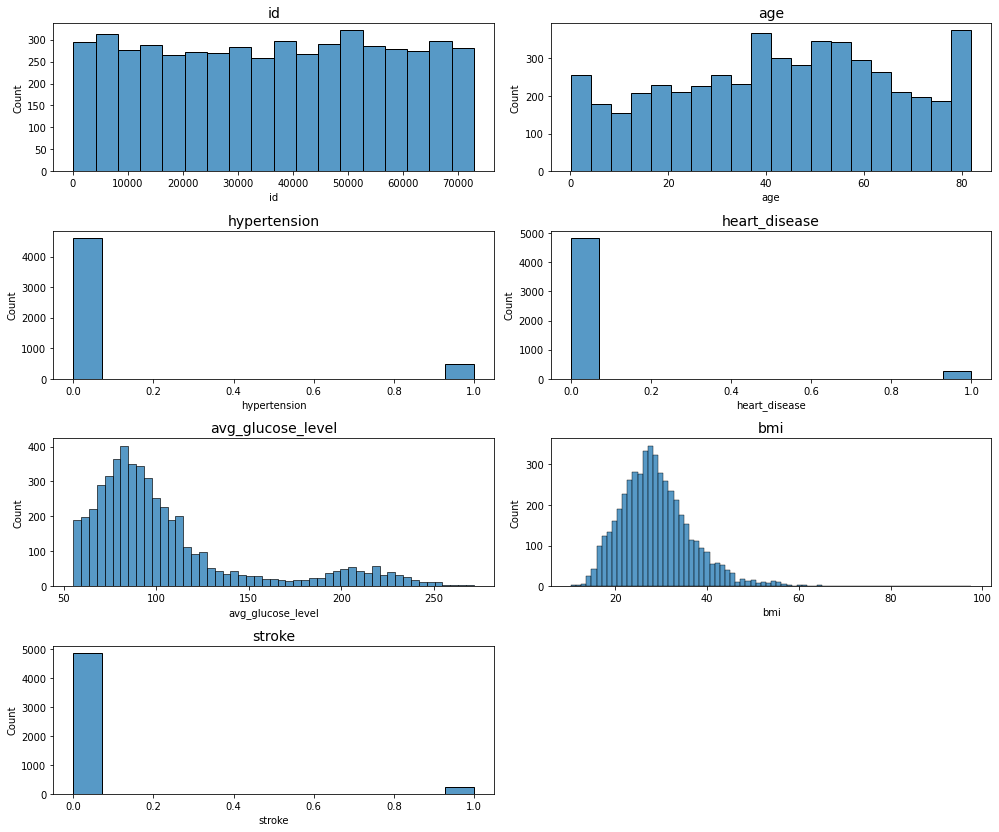

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,17))
for i, n in enumerate(num):
  axes = plt.subplot(6,2,i + 1)
  sns.histplot(x=df[n],ax=axes)
  plt.title(n, fontsize=14)
plt.tight_layout()
plt.show()

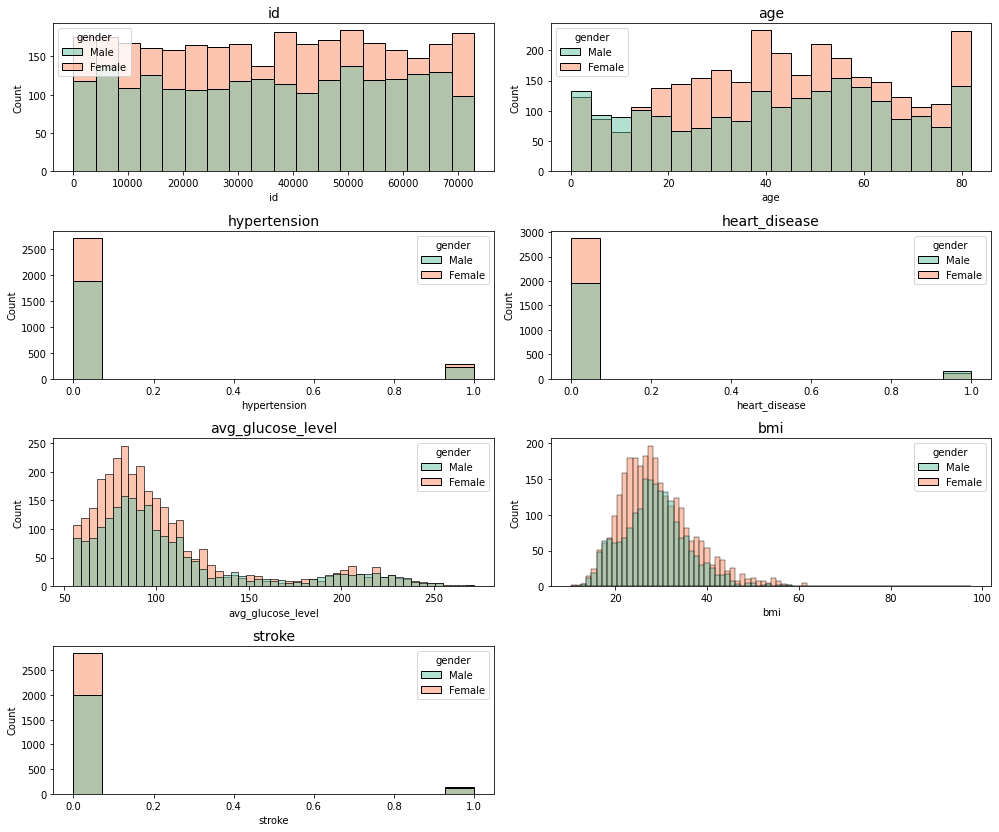

In [ ]:
# visualizando qual é o gênero mais frequente com os dados numéricos
plt.figure(figsize=(14,17))
for i, n in enumerate(num):
  axes = plt.subplot(6,2,i + 1)
  sns.histplot(x=df[n], hue=df['gender'],ax=axes, palette='Set2')
  plt.title(n, fontsize=14)
plt.tight_layout()
plt.show()

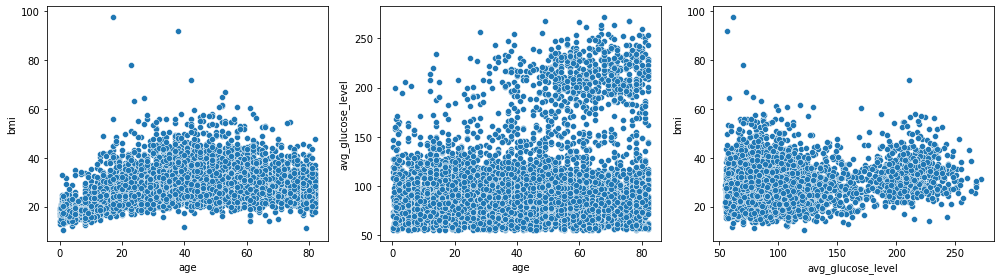

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(14,4))
sns.scatterplot(x=df['age'], y=df['bmi'], ax=axes[0])

sns.scatterplot(x=df['age'], y=df['avg_glucose_level'], ax=axes[1])

sns.scatterplot(x=df['avg_glucose_level'], y=df['bmi'], ax=axes[2])

plt.tight_layout()
plt.show()

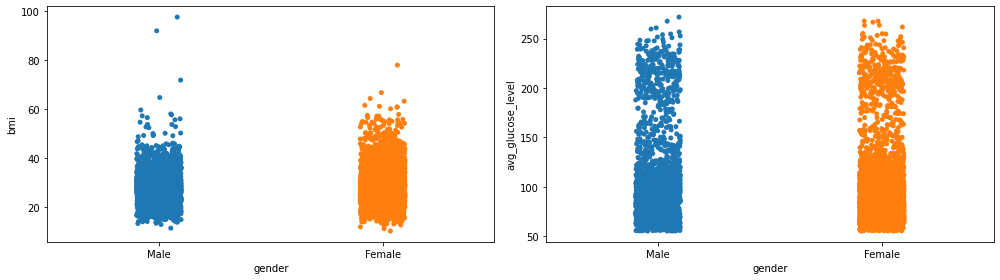

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,4))
sns.stripplot(x=df['gender'], y=df['bmi'],ax=axes[0])
sns.stripplot(x=df['gender'], y=df['avg_glucose_level'],ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
df[df['bmi'] > 70]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


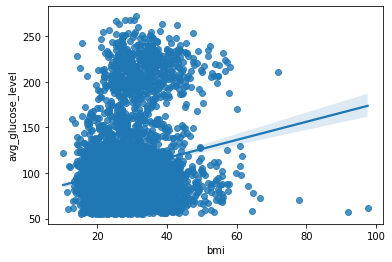

In [ ]:
sns.regplot(x=df['bmi'], y=df['avg_glucose_level'])

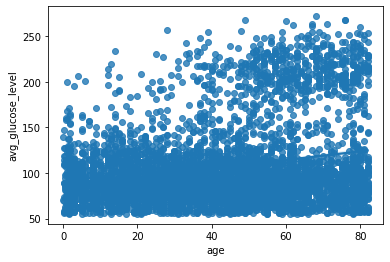

In [ ]:
sns.regplot(x=df['age'], y=df['avg_glucose_level'])

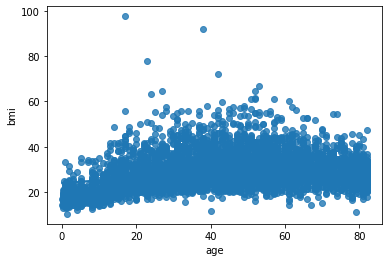

In [ ]:
sns.regplot(x=df['age'], y=df['bmi'])

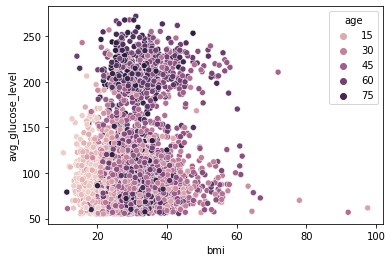

In [ ]:
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='age')

# Transformando os Dados
- Antes de jogar os dados nos modelos de classificação, temos que transformar a coluna de BMI, pois ela contém 201 valores ausentes, e para reaproveitar está coluna irei usar o método de imputação que é uma técnica de preencher os dados faltantes com valores plausíveis. Vou utilizar o método SimpleImputer da scikit-learn para isso.

In [ ]:

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
df['bmi'] = impute.fit_transform(df.bmi.values.reshape(-1,1))

dados['bmi'] = impute.fit_transform(dados.bmi.values.reshape(-1,1))

cat = df.select_dtypes(include='O')

# One Hot Encoding
df = pd.get_dummies(df, columns = [col for col in df.columns if col in cat])


# Preparação dos Dados

### Separando os dados

In [ ]:
# separando as features e a classe
y = df.stroke
x = df.drop(['stroke'], axis=1).values
x_columns = df.drop(['stroke'], axis=1)

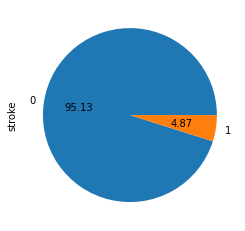

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

### Balanceando os dados

- Com os dados desbalanceados, usarei o método SMOTE, ele gera novas instâncias de casos minoritários existentes quando fornece como entrada.
??????

In [ ]:
# dados desbalanceados
sm = SMOTE(sampling_strategy='auto',random_state=42) 
x, y = sm.fit_resample(x, y)

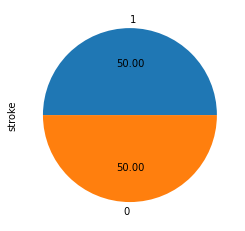

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

### Separando os dados para treino e teste

In [ ]:
# separando os daods para treino e teste
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

### Modelo Random Forest

In [ ]:
# features de importance
forest = RandomForestClassifier(n_estimators= 300,max_depth=6, random_state=42)
forest.fit(xtrain, ytrain)
forest.score(xtest, ytest)

0.9447873799725651

In [ ]:
# Visualizando os features com mais importância no conjunto de treino
result = pd.Series(forest.feature_importances_, index=x_columns.columns).sort_values(ascending=False)
print(result)

age                               2.600038e-01
ever_married_No                   8.527722e-02
ever_married_Yes                  8.427677e-02
hypertension                      8.323826e-02
heart_disease                     6.470343e-02
work_type_Private                 4.894709e-02
smoking_status_never smoked       4.700648e-02
Residence_type_Rural              4.604381e-02
work_type_Self-employed           4.437160e-02
Residence_type_Urban              3.923006e-02
smoking_status_formerly smoked    3.814054e-02
smoking_status_Unknown            3.284641e-02
gender_Male                       3.159916e-02
gender_Female                     2.898322e-02
avg_glucose_level                 2.179971e-02
smoking_status_smokes             1.541087e-02
work_type_Govt_job                1.131227e-02
id                                7.907106e-03
bmi                               6.023156e-03
work_type_children                2.879024e-03
work_type_Never_worked            1.670846e-08
dtype: float6

In [ ]:
# encontrado o melhor parâmetros
param_grid = {
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3],
    'n_estimators':[50,70,100,200,300]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=4, n_jobs=-1,verbose=2)

grid_search.fit(xtrain, ytrain)

# o melhor parâmetro
grid_search.best_params_

Fitting 4 folds for each of 70 candidates, totalling 280 fits


{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [ ]:
# o melhor estimador
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, max_features=3, random_state=42)

In [ ]:
# adicionando os parâmetros no modelo Random Forest
forest = RandomForestClassifier(max_depth=8, max_features=2, n_estimators=300,
                       random_state=42)
forest.fit(xtrain,ytrain)

print('Train Score:', forest.score(xtrain, ytrain))
print('Test Score:',forest.score(xtest,ytest))

print('Classification Report:')
print(classification_report(ytest, forest.predict(xtest)))

Train Score: 0.9722222222222222
Test Score: 0.9523319615912208
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1458
           1       0.98      0.93      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916



In [ ]:
# matrix de confusão
cm = confusion_matrix(ytest, forest.predict(xtest))

# porcentagem das classes na matrix de confusão
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm_norm

array([[0.978738  , 0.021262  ],
       [0.07407407, 0.92592593]])

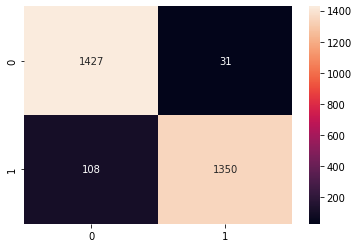

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

- O Modelo conseguiu acerta 1383 da classe 1 e 1436 da classe 0.

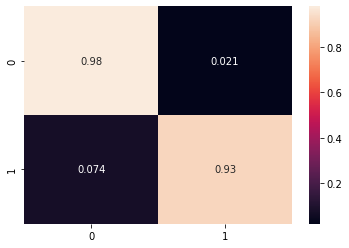

In [ ]:
sns.heatmap(cm_norm, annot=True)

- O modelo acertou 94% dos dados da classe 1 como sendo certo, e acertou 96% dos dados da classe 0 como verdadeiros. 

- No primeiro treinamento com o Random Forest ele deu como resultado 93% de acurácia, depois de utilizar O GridSearch e encontrar o melhor parâmetro para o modelo da Random Forest, arredondando o resultado foi dado 95% de acúracia.

## Modelo Gradient

- Vou utilizar dos mesmo código feito com o Random Forest no modelo Gradient Boosting e verificar se há alguma diferença e melhora no resultado.

In [ ]:
# Retirando duas features dadas como não importante no conjunto de treino
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(6804, 21) (2916, 21)
(6804,) (2916,)


In [ ]:
grade = GradientBoostingClassifier(random_state=42)

grade.fit(xtrain,ytrain)
grade.score(xtest,ytest)

0.9588477366255144

In [ ]:
# Adicionando os mesmo parâmetros do modelo anterior
params = {
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3],
    'n_estimators':[50,70,100,200,300]
}

grid_search = GridSearchCV(estimator=grade, param_grid=params, cv=4, n_jobs=-1)

grid_search.fit(xtrain,ytrain)

grid_search.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 70}

In [ ]:
# imprimindo o melhor parâmetro
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=8, max_features=3, n_estimators=70,
                           random_state=42)

In [ ]:
grade = GradientBoostingClassifier(max_depth=8, n_estimators=300, max_features=3, random_state=42)
grade.fit(xtrain,ytrain)

y_pred = grade.predict(xtrain)
y_pred_t = grade.predict(xtest)

print('Train Score:',grade.score(xtrain, ytrain))
print('Test Score:',grade.score(xtest, ytest))

print('Classification Report')
print(classification_report(ytest, grade.predict(xtest)))

Train Score: 1.0
Test Score: 0.9684499314128944
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.99      0.94      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



- No modelo anterior do Gradient a acúracia foi de 95%, agora utilizando o GridSearch para encontrar o melhor parâmetro, o resultado foi de 97%. Em comparação entre o Gradient Boosting e Random Forest utilizando dos mesmo parâmetros, o Gradient foi o melhor.

In [ ]:
# Matrix de Confusão
cm = confusion_matrix(ytest, grade.predict(xtest))

# Visualizando a porcentagem através da matrix
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

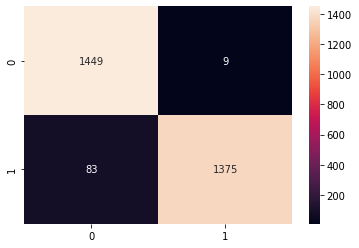

In [ ]:
# imprimindo o resultado 
sns.heatmap(cm, annot=True, fmt='d')

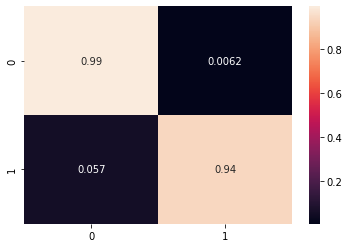

In [ ]:
sns.heatmap(cm_norm, annot=True)

- O modelo acertou 94% dos dados da classe 1 como sendo certo, e acertou 99% dos dados da classe 0 como verdadeiros. 

## Adicionado a previsão no novo conjunto de dados

In [ ]:
# criando tabela com o conjunto de treino
new = pd.DataFrame(xtrain, columns=x_columns.columns)
new['stroke'] = ytrain.values
new['level'] = 'Dados Existem'
new['Predictions'] = y_pred

# criando tabela com o conjunto de teste
new1 = pd.DataFrame(xtest, columns=x_columns.columns)
new1['stroke'] = ytest
new1['level'] = 'Dados Novos'
new1['Predictions'] = y_pred_t

# juntando os novos conjuntos de dados
final = pd.concat([new, new1], ignore_index=True)

print(new.shape)
print(new1.shape)
print(final.shape)

(6804, 24)
(2916, 24)
(9720, 24)


In [ ]:
print('Conjunto de dados novos')
display(final.sample())
print('Conjunto de dados original')
display(dados.sample())

Conjunto de dados novos


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,level,Predictions
2176,43721.771114,67.24308,0.488951,0.0,162.176133,27.521005,0.511049,0.488951,0.0,1.0,...,0.0,1.0,0.0,0.511049,0.0,0.488951,0.0,1.0,Dados Existem,1


Conjunto de dados original


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4500,13598,Male,60.0,0,0,Yes,Self-employed,Urban,227.23,40.0,formerly smoked,0


In [ ]:
# mesclando o  novo conjunto de dados com a predição ao antigo conjunto de dados original, tendo como referência a coluna 'id'
new_data = dados.merge(final[['id','level', 'Predictions']], how='left', on='id')
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,level,Predictions
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,Dados Novos,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1,Dados Existem,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,Dados Existem,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,Dados Novos,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,Dados Existem,1


In [ ]:
print(dados.shape)
print(new_data.shape)

(5109, 12)
(5109, 14)


In [ ]:
# salvando o arquivo para csv
#new_data.to_csv('Predicao_AVC_Fumantes', index=None)